In [26]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import plotly.express as px
from pyrolite.util.plot.style import ternary_color
from pyrolite.util.synthetic import normal_frame

In [9]:
df=pd.read_csv(r'C:\notebooks\elec_gen_analysis\our_world_in_data_tables.csv')

In [10]:
df.head(5)

,Country,Code,Year,All,Coal,Oil,Gas,LowCarbon,Population,HDI,HighCarbon,MedCarbon,LowCarbonFrac,MedCarbonFrac,HighCarbonFrac,ElecPerCapita,logEnergyUse,logAll
0,Indonesia,IDN,1985,16.36900,5.211962,6.575809,1.814685,2.766544,165791700.0,NaN,11.787771,1.814685,0.169011,0.110861,0.720128,98.732325,1.994459,1.214022
1,Italy,ITA,1985,185.74000,30.023000,76.174000,24.712000,50.951996,56636468.0,NaN,106.197000,24.712000,0.274319,0.133046,0.571751,3279.512416,3.515809,2.268905
2,Poland,POL,1985,137.71400,131.520950,1.680000,0.081000,2.249000,37179164.0,NaN,133.200950,0.081000,0.016331,0.000588,0.967229,3704.063921,3.568678,2.138978
3,Thailand,THA,1985,23.02995,5.313000,3.351912,10.666000,3.691000,50594932.0,NaN,8.664912,10.666000,0.160270,0.463136,0.376245,455.182942,2.658186,1.362293
4,Germany,DEU,1985,522.53400,312.880000,9.595000,27.985000,NaN,77638810.0,NaN,322.475000,27.985000,NaN,0.053556,0.617137,6730.319540,3.828036,2.718115


#### Basic description of the dataset
**Country** the name of the country\
**Code** The country code is useful in choropleth plots\
**Year** The year\
**All** Total annual generated electricity (TWh)\
**Coal** Annual electricity generated by Coal (TWh)\
**Oil** Annual electricity generated by Oil (TWh)\
**Gas** Annual electricity generated by Gas (TWh)\
**LowCarbon** Annual electricity generated by Low Carbon sources (e.g. Nuclear, Hydropower, Wind, Solar)\
**Population** Population\
**HDI** Human Development Index\
**HighCarbon** Annual electricity generated by Coal and Oil (TWh)\
**MedCarbon**  Annual electricity generated by Gas (TWh)\
**LowCarbonFrac** The fraction of annual electricity generated by low carbon sources\
**MedCarbonFrac** The fraction of annual electricity generated by gas\
**HighCarbonFrac** The fraction of annual electricity generated by coal and oil\
**ElecPerCapita** Annual electricity generated per capita (KWh)\
**logEnergyUse** The base10 logarithm of the _ElecPerCapita_ column\
**logAll** The base10 logarithm of the _All_ column 

In [111]:
fig = px.choropleth(df[df['Year']>=2000], locations='Code', color='ElecPerCapita',range_color=(0,15000),hover_name='Country',
                    projection='natural earth',animation_frame='Year',color_continuous_scale='turbo',
                    title='Annual Energy Generated per Capita (KWh)')
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    font_size=16,
)
fig.show()

In [23]:
fig=px.scatter(df[df['Year']>=2000], x="ElecPerCapita", y="HDI", animation_frame="Year", animation_group="Country",
           size="Population", color="LowCarbonFrac", hover_name="Country",color_continuous_scale='turbo_r',
           log_x=True,size_max=80,labels={
                     "ElecPerCapita": "Annual Electricity Generated Per Capita (KWh)",
                     "HDI": "Human Development Index",
                     "LowCarbonFrac": "Low Carbon Electricity<br>(Fraction)"
                 },)
 
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    font_size=16,
)
fig.show()

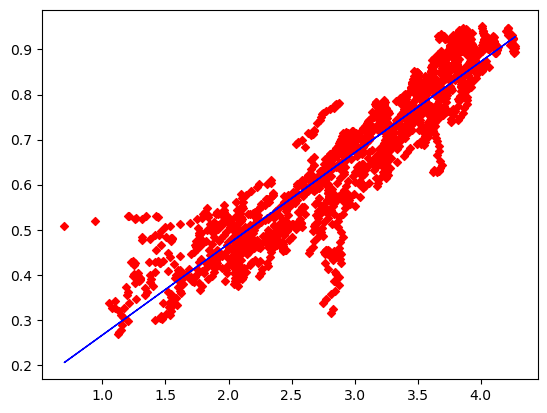

In [68]:
subdf=df[(df['Population']>10e+6) & (df['Year']>2000)]
X=subdf.dropna()['logEnergyUse'].values.reshape(len(subdf.dropna()),1)
y=subdf.dropna()['HDI'].values.reshape(len(subdf.dropna()),1)
lrm = linear_model.LinearRegression()
lrm.fit(X,y)
plt.scatter(subdf['logEnergyUse'],subdf['HDI'], color='red')
plt.plot(X, lrm.predict(X), color='blue')
plt.show()

In [69]:
print(r2_score(y,lrm.predict(X)))

0.8492946477362957


In [70]:
print('Linear model equation: y =', round(lrm.coef_[0][0],4),'* x +',round(lrm.intercept_[0],4))

Linear model equation: y = 0.2022 * x + 0.0641


In [75]:
target_countries=df[(df['Year']==2021) & (df['HDI']<0.7) & (df['Population']>1e+6)]['Country'].unique()

In [76]:
target_countries

array(['South Sudan', 'East Timor', 'Benin', 'Senegal', 'Burundi',
       'Nicaragua', 'Guinea', 'Venezuela', 'Bangladesh', 'Guinea-Bissau',
       'Haiti', 'Afghanistan', 'Central African Republic', 'Djibouti',
       'Honduras', 'Niger', 'Morocco', 'Mali', 'Iraq',
       'Democratic Republic of Congo', 'Sierra Leone', 'Myanmar',
       'Guatemala', 'Zimbabwe', 'Namibia', 'Pakistan', 'Togo', 'Eritrea',
       'Mozambique', 'Chad', 'Papua New Guinea', 'Tajikistan', 'Tanzania',
       'Equatorial Guinea', 'Zambia', 'Cameroon', 'Botswana', 'Ethiopia',
       "Cote d'Ivoire", 'Laos', 'Eswatini', 'Madagascar', 'Cambodia',
       'Angola', 'Uganda', 'Kyrgyzstan', 'Bolivia', 'Sudan',
       'Burkina Faso', 'Rwanda', 'Ghana', 'Malawi', 'Philippines',
       'Nigeria', 'Mauritania', 'Liberia', 'Congo', 'Yemen',
       'El Salvador', 'Gambia', 'Kenya', 'Syria', 'India', 'Lesotho',
       'Nepal'], dtype=object)

In [87]:
records=[]
subdf=df[df['Year']==2021]
for country in target_countries:
    subdf2=subdf[subdf['Country']==country]
    curr_hdi=subdf2['HDI'].iloc[0]
    curr_power_gen = subdf2['ElecPerCapita'].iloc[0]
    population = subdf2['Population'].iloc[0]
    delta_power = (1396-curr_power_gen)*population*1e-9
    records.append([country, curr_hdi, curr_power_gen, population,delta_power])
tardf = pd.DataFrame(records, columns=['Country', 'HDI_2021', 'PowerPerCapita_2021', 'Population_2021','RequiredFor0.7'])

    


In [88]:
tardf=tardf[tardf['RequiredFor0.7']>0]

In [89]:
tardf['RequiredFor0.7'].sum()

2206.226358636

In [ ]:
#CO2_concentration (EIA, 2019)


<Axes: xlabel='HDI', ylabel='LowCarbonFrac'>

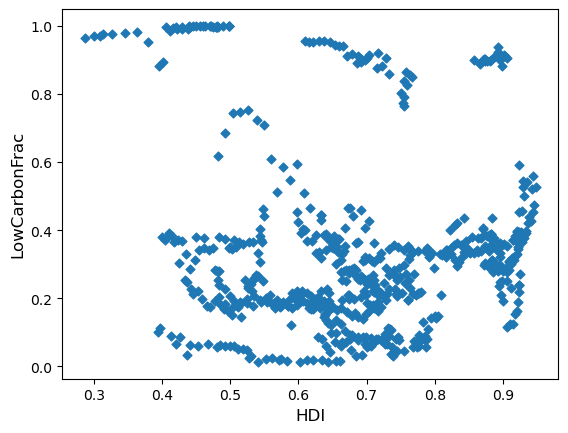

In [95]:
df[df['Population']>60e+6].plot.scatter('HDI','LowCarbonFrac')

In [99]:
fig = px.choropleth(df[df['Year']>=2000], locations='Code', color='All',range_color=(0,10000),hover_name='Country',
                    projection='natural earth',animation_frame='Year',color_continuous_scale='turbo',
                    title='Annual Energy Generated per Capita (KWh)')
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    font_size=16,
)
fig.show()

In [101]:
list(tardf)

['Country',
 'HDI_2021',
 'PowerPerCapita_2021',
 'Population_2021',
 'RequiredFor0.7']

In [102]:
tardf = tardf.merge(df[df['Year']==2021], how='left', on=['Country'])

In [103]:
list(tardf)

['Country',
 'HDI_2021',
 'PowerPerCapita_2021',
 'Population_2021',
 'RequiredFor0.7',
 'Code',
 'Year',
 'All',
 'Coal',
 'Oil',
 'Gas',
 'LowCarbon',
 'Population',
 'HDI',
 'HighCarbon',
 'MedCarbon',
 'LowCarbonFrac',
 'MedCarbonFrac',
 'HighCarbonFrac',
 'ElecPerCapita',
 'logEnergyUse',
 'logAll']

In [104]:
tardf['CO2_emissions']=tardf['RequiredFor0.7']*tardf['HighCarbonFrac']*1e9*1/1e12+ \
                       tardf['RequiredFor0.7']*tardf['MedCarbonFrac']*1e9*0.41/1e12+ \
                       tardf['RequiredFor0.7']*tardf['LowCarbonFrac']*1e9*0.02/1e+12 

In [105]:
tardf.CO2_emissions.sum()

0.9191914187328938

In [106]:
tardf.All.sum()

2443.0499999999997

In [108]:
tardf.sort_values(by='CO2_emissions',ascending=False).iloc[0]

Country                       India
HDI_2021                      0.633
PowerPerCapita_2021     1218.246646
Population_2021        1407563900.0
RequiredFor0.7           250.199204
Code                            IND
Year                           2021
All                         1714.76
Coal                        1274.13
Oil                            3.38
Gas                           59.84
LowCarbon                    377.41
Population             1407563900.0
HDI                           0.633
HighCarbon                  1277.51
MedCarbon                     59.84
LowCarbonFrac              0.220095
MedCarbonFrac              0.034897
HighCarbonFrac             0.745008
ElecPerCapita           1218.246646
logEnergyUse               3.085735
logAll                     3.234203
CO2_emissions              0.191082
Name: 57, dtype: object

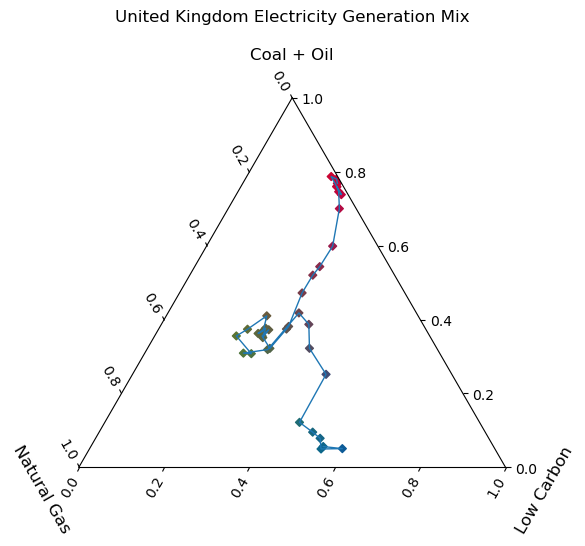

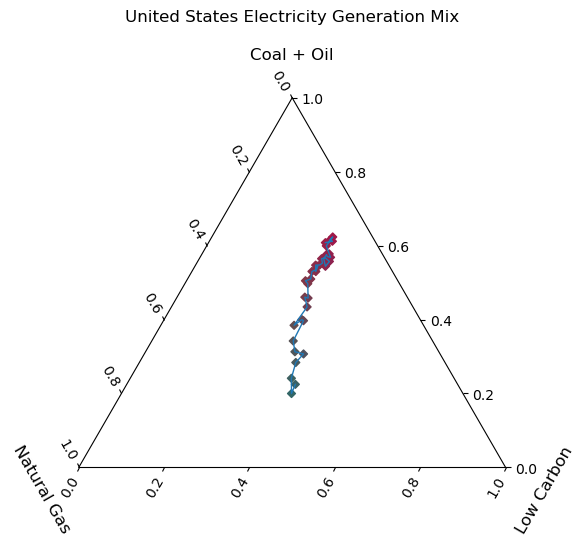

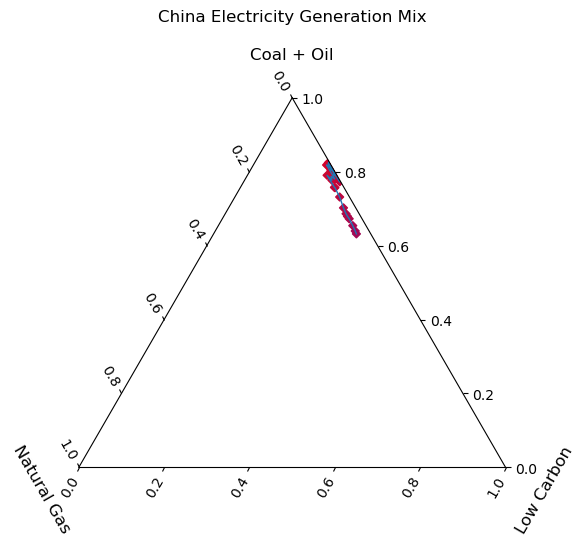

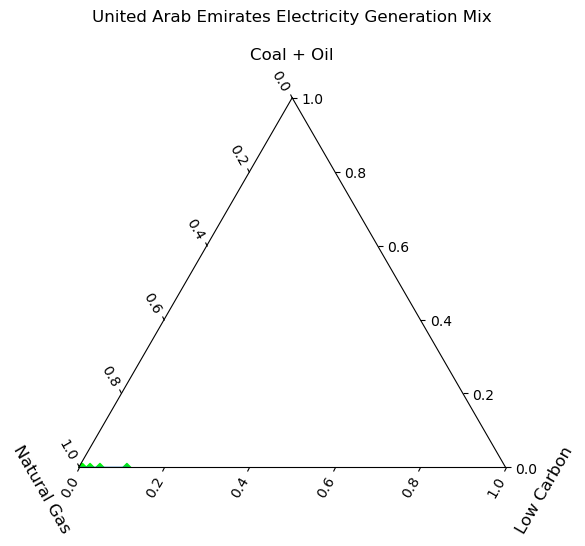

In [110]:
for country in ['United Kingdom', 'United States', 'China', 'United Arab Emirates']:
    ax=plt.gca()
    subdf=df[(df['Country']==country)]
    subdf2=subdf[['HighCarbonFrac','MedCarbonFrac','LowCarbonFrac']].copy()
    subdf2.columns=['Coal + Oil', 'Natural Gas', 'Low Carbon']
    colors=ternary_color(subdf2)
    subdf2.pyroplot.scatter(c=colors,ax=ax)
    subdf2.pyroplot.plot(c='b',ax=ax)
    plt.title(str(country)+' Electricity Generation Mix\n')
    plt.show()